In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import math
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Estatura,Edad,Y
0,1.77,26.0,0
1,1.74,31.0,0
2,1.72,24.0,0
3,1.78,24.0,0
4,1.65,32.0,0


In [4]:
x = data.iloc[:,0:2]  
y = data.iloc[:,-1] 

Text(0, 0.5, 'Edad')

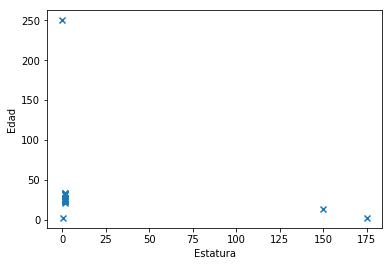

In [5]:
plt.scatter(x["Estatura"], x["Edad"], marker = "x")
plt.xlabel('Estatura')
plt.ylabel('Edad')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

In [7]:
def getMuSigma(x):
    mu = np.mean(x, axis=0)
    sigma = np.cov(x.T)
    return mu, sigma

def getPDF(x,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma).pdf(x)
    return p

In [8]:
mu,sigma = getMuSigma(X_train)
print(mu,sigma)

Estatura    12.101429
Edad        40.242857
dtype: float64 [[1575.60135165 -320.4572967 ]
 [-320.4572967  3709.68725275]]


In [9]:
pdf = getPDF(X_train,mu,sigma)
pdf

array([6.12847007e-05, 6.13311774e-05, 6.35719597e-05, 6.13126300e-05,
       6.32146366e-05, 1.74383492e-07, 6.15154474e-05, 5.08601363e-05,
       1.58972477e-07, 6.36299448e-05, 6.09731464e-05, 6.16181594e-05,
       6.21547371e-05, 6.15483187e-05])

In [10]:
def getEpsilons(p, y):
    F_actual = 0
    _epsilon = 0
    _f1 = 0
    steps = (max(p) - min(p)) / 1000;
    epsilons = np.arange(min(p), max(p), steps)
    for epsilon_actual in epsilons:
        pred = (p < epsilon_actual).astype(int)
        F_actual = f1_score(y, pred, average='binary')
        if F_actual > _f1:
            _f1 = F_actual
            _epsilon = epsilon_actual

    return _f1, _epsilon



In [15]:
pdf_test = getPDF(X_test,mu,sigma)
fscore, ep = getEpsilons(pdf,y_train)
anomalies = np.asarray(np.where(pdf_test < ep))[0]
print(anomalies,X_test)


/home/eunice/.conda/envs/galileo_python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[8]     Estatura  Edad
8       1.85  26.0
16      1.70  26.0
0       1.77  26.0
18      1.66  26.0
11      1.79  24.0
9       1.75  21.0
13      1.65  25.0
1       1.74  31.0
21    175.10   2.5
5       1.66  32.0


In [16]:
plotX= X_test.values
plotX[anomalies,0]

array([175.1])

Text(0, 0.5, 'Edad')

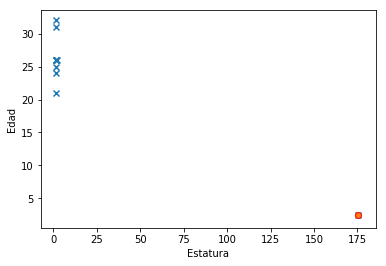

In [18]:
plt.scatter(X_test["Estatura"], X_test["Edad"], marker = "x")
plt.scatter(plotX[anomalies,0], plotX[anomalies,1],  edgecolors = 'r')
plt.xlabel('Estatura')
plt.ylabel('Edad')